<a href="https://colab.research.google.com/github/AnushaPalla/Deep-learning/blob/master/ICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32 
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,)) 

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')





In [0]:
pip install tensorboardcolab

Wait for 8 seconds...
TensorBoard link:
http://9963c5c5.ngrok.io
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3690 - val_loss: 0.2718
Epoch 2/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2651 - val_loss: 0.2544
Epoch 3/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2431 - val_loss: 0.2295
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2213 - val_loss: 0.2112
Epoch 5/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2064 - val_loss: 0.1991
Epoch 6/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.1960 - val_loss: 0.1903
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1882 - val_loss: 0.1834
Epoch 8/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1817 - val_loss: 0.1773
Epoch 9/20
60000/60000 [=====================

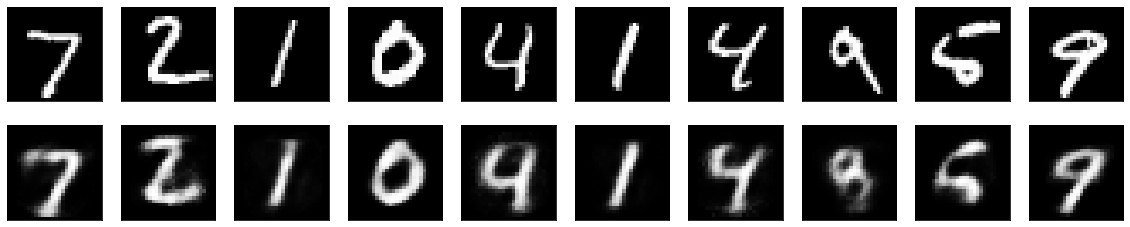

In [0]:
from tensorboardcolab import *
tbc=TensorBoardColab()

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=((x_test, x_test)),callbacks=[TensorBoardColabCallback(tbc)])

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)    


# use Matplotlib 
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()